Importng Libraries

In [70]:
import numpy as np 
import pandas as pd
import os 
import cv2
import h5py
import pickle
import matplotlib.pyplot as plt 
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import np_utils
from tensorflow.keras.layers import BatchNormalization,Dropout
from tensorflow.python.keras import Sequential,backend,optimizers
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


Identifying Dependent and Independent Objects

In [49]:
parasitized_data = os.listdir('C:/Users/NANDINI MK/Desktop/malaria datatset/parasitized')
uninfected_data = os.listdir('C:/Users/NANDINI MK/Desktop/malaria datatset/uninfected')
data = []
labels = []

for img in parasitized_data:
    try:
        img_read = plt.imread('C:/Users/NANDINI MK/Desktop/malaria datatset/parasitized/' + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('C:/Users/NANDINI MK/Desktop/malaria datatset/Uninfected/' + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

image_data = np.array(data)
labels = np.array(labels)
print("image_data:",len(image_data))
print("labels:",len(labels))

image_data: 120
labels: 120


Data Visualization

Parasitized Sample:



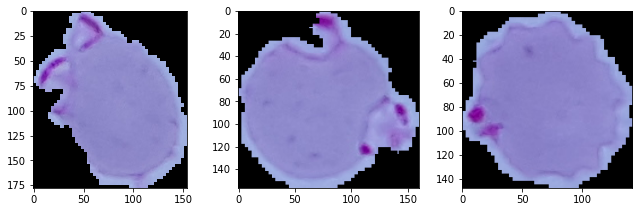

Uninfected Sample:



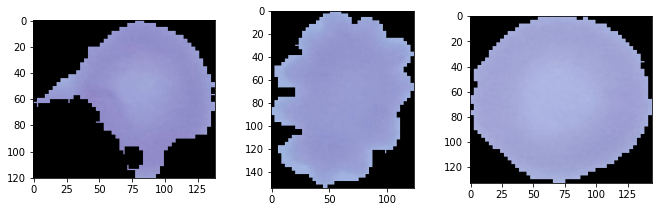

In [50]:
print("Parasitized Sample:\n")
plt.figure(figsize = (15,15))
for i in range(3):
    plt.subplot(4, 4, i+1)
    img = cv2.imread('C:/Users/NANDINI MK/Desktop/malaria datatset/parasitized/'+ parasitized_data[i])
    plt.imshow(img)
plt.show()

print("Uninfected Sample:\n")
plt.figure(figsize = (15,15))
for i in range(3):
    plt.subplot(4, 4, i+1)
    img = cv2.imread('C:/Users/NANDINI MK/Desktop/malaria datatset/Uninfected/'+ uninfected_data[i])
    plt.imshow(img)
plt.show()

Dividng into train and test

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2,random_state = 0)

y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

print("X_train:",len(X_train))
print("X_test:",len(X_test))
print("y_train:",len(y_train))
print("y_test:",len(y_test))

X_train: 96
X_test: 24
y_train: 96
y_test: 24


Building the CNN model

In [55]:
model = Sequential()
    
inputShape = (50, 50, 3)

if backend.image_data_format() == 'channels_first':
          inputShape = (3, 50, 50)
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Flatten())
    
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))
model.build(input_shape=(None, 50, 50, 3))
    
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_21 (ModuleWr  (None, 48, 48, 32)       896       
 apper)                                                          
                                                                 
 module_wrapper_22 (ModuleWr  (None, 24, 24, 32)       0         
 apper)                                                          
                                                                 
 batch_normalization_17 (Bat  (None, 24, 24, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_16 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 module_wrapper_23 (ModuleWr  (None, 22, 22, 32)       9248      
 apper)                                               

Compiling the model

In [56]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Fitting the model

In [57]:
history=model.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
3/3 [==============================] - 3s 116ms/step - loss: 1.1226 - accuracy: 0.5625
Epoch 2/30
3/3 [==============================] - 0s 105ms/step - loss: 0.7738 - accuracy: 0.7604
Epoch 3/30
3/3 [==============================] - 0s 104ms/step - loss: 0.8518 - accuracy: 0.7604
Epoch 4/30
3/3 [==============================] - 0s 105ms/step - loss: 0.5986 - accuracy: 0.8125
Epoch 5/30
3/3 [==============================] - 0s 99ms/step - loss: 0.5463 - accuracy: 0.7917
Epoch 6/30
3/3 [==============================] - 0s 99ms/step - loss: 0.5858 - accuracy: 0.7917
Epoch 7/30
3/3 [==============================] - 0s 92ms/step - loss: 0.6274 - accuracy: 0.8542
Epoch 8/30
3/3 [==============================] - 0s 98ms/step - loss: 0.3534 - accuracy: 0.8333
Epoch 9/30
3/3 [==============================] - 0s 90ms/step - loss: 0.3277 - accuracy: 0.8646
Epoch 10/30
3/3 [==============================] - 0s 91ms/step - loss: 0.2782 - accuracy: 0.8646
Epoch 11/30
3/3 [========

Evaluating the model

In [31]:
loss,accuracy = model.evaluate(X_train, y_train)
print("Loss: ",predict[0])
print("Accuracy: ",predict[1]*100)

3/3 [==============================] - 0s 23ms/step - loss: 0.6038 - accuracy: 0.9167
Loss:  0.6037972569465637
Accuracy:  91.66666865348816


In [32]:
loss1,accuracy1 = model.evaluate(X_test, y_test)
print("Loss: ",predict[0])
print("Accuracy: ",predict[1]*100)

1/1 [==============================] - 0s 89ms/step - loss: 0.6479 - accuracy: 0.7083
Loss:  0.6037972569465637
Accuracy:  91.66666865348816


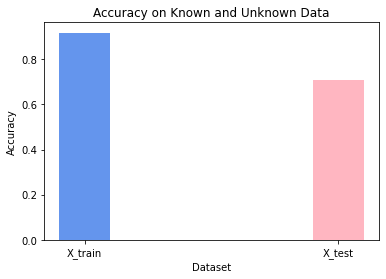

In [33]:
plt.bar('X_train', accuracy, color = 'cornflowerblue', width = 0.2, align = 'center')
plt.bar('X_test', accuracy1, color = 'lightpink', width = 0.2, align = 'center')
plt.title('Accuracy on Known and Unknown Data')
plt.ylabel('Accuracy')
plt.xlabel('Dataset')
plt.show()

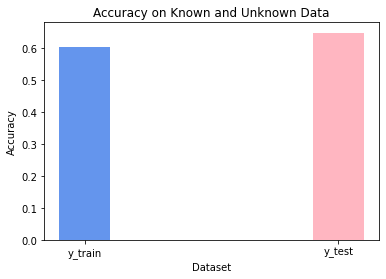

In [40]:
plt.bar('y_train', loss, color = 'cornflowerblue', width = 0.2, align = 'center')
plt.bar('y_test', loss1, color = 'lightpink', width = 0.2, align = 'center')
plt.title('Accuracy on Known and Unknown Data')
plt.ylabel('Accuracy')
plt.xlabel('Dataset')
plt.show()